In [1]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)

In [2]:
# column name
Columns_Name=['Age','Workclass','Final Weight','Education','Education Number of Years','Marital-status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-loss','Hours-per-week','Native-country','Income']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None) # Load the data
df.columns = Columns_Name   # add column name in dataset
df.head()


,Age,Workclass,Final Weight,Education,Education Number of Years,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.shape  # shape of data

(32561, 15)

In [4]:
df.isnull().sum()   # check null values

Age                          0
Workclass                    0
Final Weight                 0
Education                    0
Education Number of Years    0
Marital-status               0
Occupation                   0
Relationship                 0
Race                         0
Sex                          0
Capital-gain                 0
Capital-loss                 0
Hours-per-week               0
Native-country               0
Income                       0
dtype: int64

No null values in dataset

In [5]:
df.info() # general indo 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        32561 non-null  int64 
 1   Workclass                  32561 non-null  object
 2   Final Weight               32561 non-null  int64 
 3   Education                  32561 non-null  object
 4   Education Number of Years  32561 non-null  int64 
 5   Marital-status             32561 non-null  object
 6   Occupation                 32561 non-null  object
 7   Relationship               32561 non-null  object
 8   Race                       32561 non-null  object
 9   Sex                        32561 non-null  object
 10  Capital-gain               32561 non-null  int64 
 11  Capital-loss               32561 non-null  int64 
 12  Hours-per-week             32561 non-null  int64 
 13  Native-country             32561 non-null  object
 14  Income

In [6]:
## segregate numerical and categorical columns

num_columns=df.columns[df.dtypes!='object']
cat_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",num_columns)
print('Categorical Columns:',cat_columns)

Numerical columns: Index(['Age', 'Final Weight', 'Education Number of Years', 'Capital-gain',
       'Capital-loss', 'Hours-per-week'],
      dtype='object')
Categorical Columns: Index(['Workclass', 'Education', 'Marital-status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native-country', 'Income'],
      dtype='object')


In [7]:
df[num_columns].describe().T  # statistical info

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
Final Weight,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education Number of Years,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
Capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
Capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
Hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [8]:
df[cat_columns].describe().T # statistical info

,count,unique,top,freq
Workclass,32561,9,Private,22696
Education,32561,16,HS-grad,10501
Marital-status,32561,7,Married-civ-spouse,14976
Occupation,32561,15,Prof-specialty,4140
Relationship,32561,6,Husband,13193
Race,32561,5,White,27816
Sex,32561,2,Male,21790
Native-country,32561,42,United-States,29170
Income,32561,2,<=50K,24720


In [9]:
for i in df.columns:
    print(df[i].value_counts())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: Final Weight, Length: 21648, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

1. Workclass, Occupation and Native country has '?'.
2. Target column 'Income' is Imbalanced
3. Replace '?' to nan value and remove spaces if any

In [10]:
df = df.replace({' ':''}, regex=True)  # Remove space " "

In [11]:
# replace '?' with NaN
df = df.replace({'?': np.nan})

In [12]:
df.isnull().sum()

Age                             0
Workclass                    1836
Final Weight                    0
Education                       0
Education Number of Years       0
Marital-status                  0
Occupation                   1843
Relationship                    0
Race                            0
Sex                             0
Capital-gain                    0
Capital-loss                    0
Hours-per-week                  0
Native-country                583
Income                          0
dtype: int64

#### Now found Workclass, Occupation and Native country has Missing values

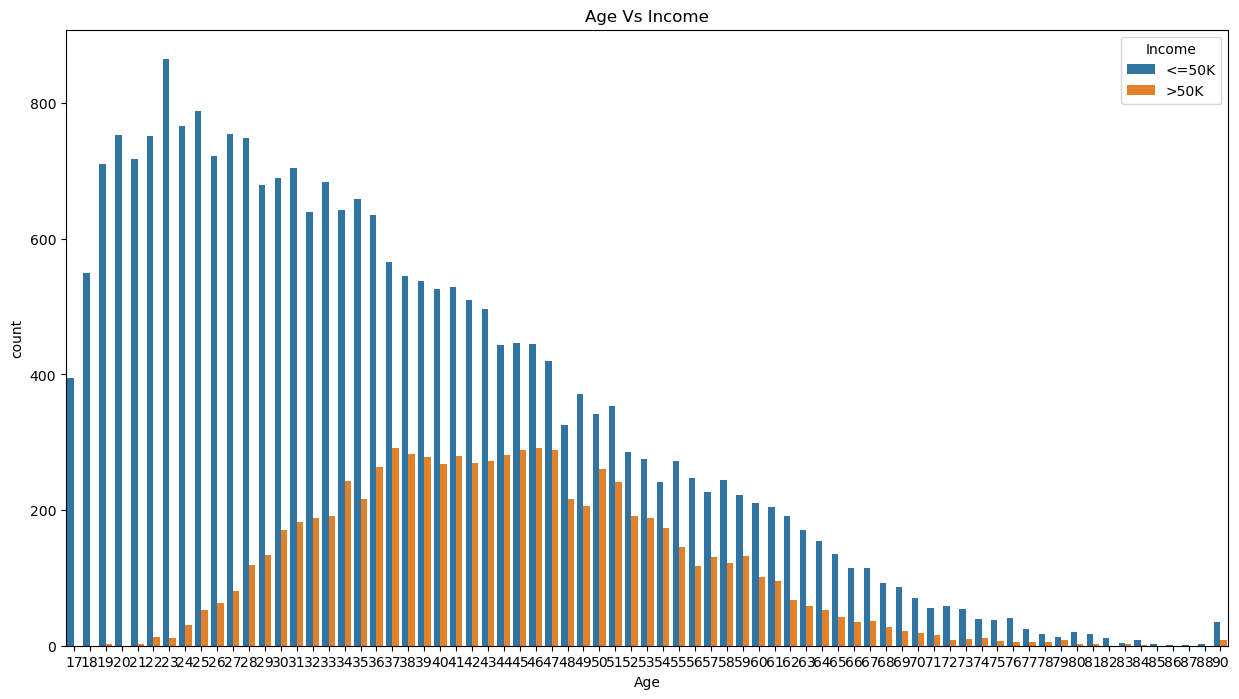

In [13]:
# Create a box plot of a numerical variable grouped by a categorical variable
plt.figure(figsize=(15, 8))
sns.countplot(df, x='Age',hue='Income')
plt.xlabel('Age')
plt.title('Age Vs Income')
plt.show()

#### Age Between approx 30 to 55 earn more comparison to others

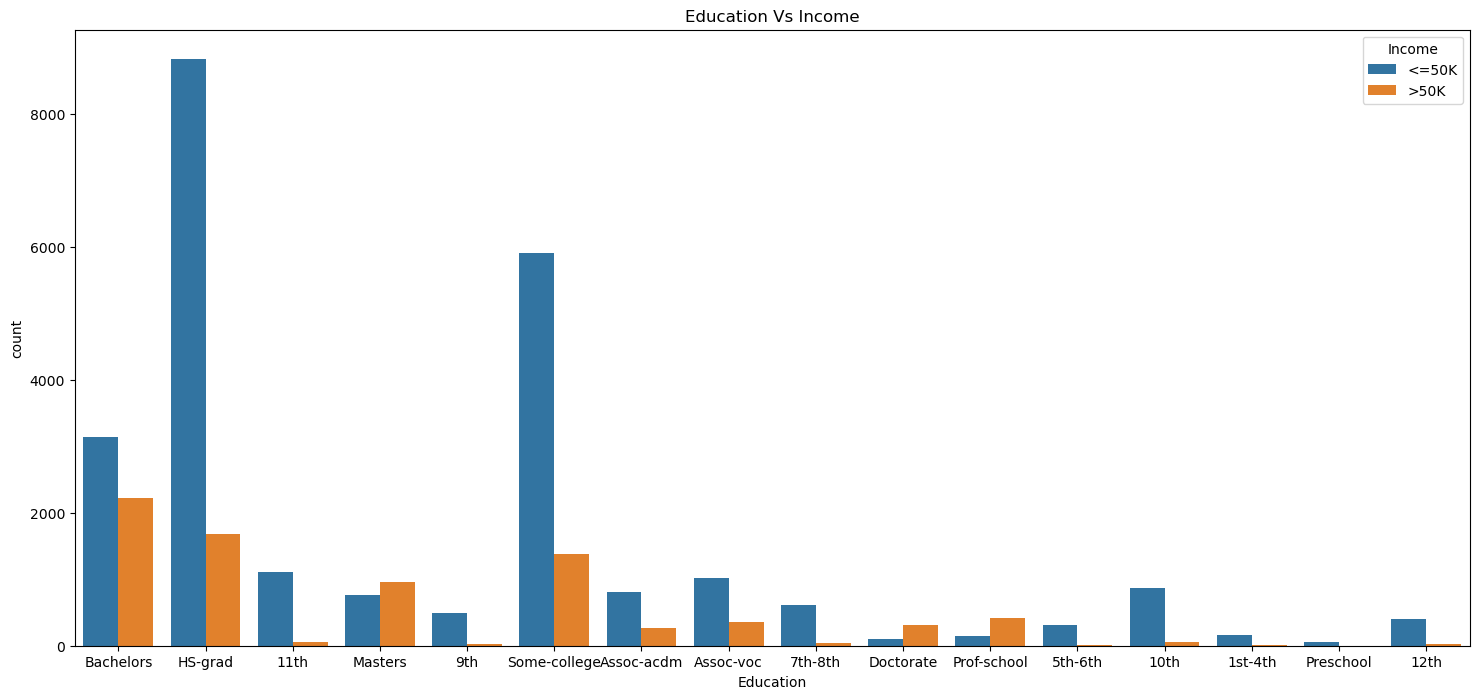

In [14]:
# Create a box plot of a numerical variable grouped by a categorical variable
plt.figure(figsize=(18, 8))
sns.countplot(df, x='Education',hue='Income')
plt.xlabel('Education')
plt.title('Education Vs Income')
plt.show()

#### Who has Bachelors Degree Earn more comparison to Other Education Qualification

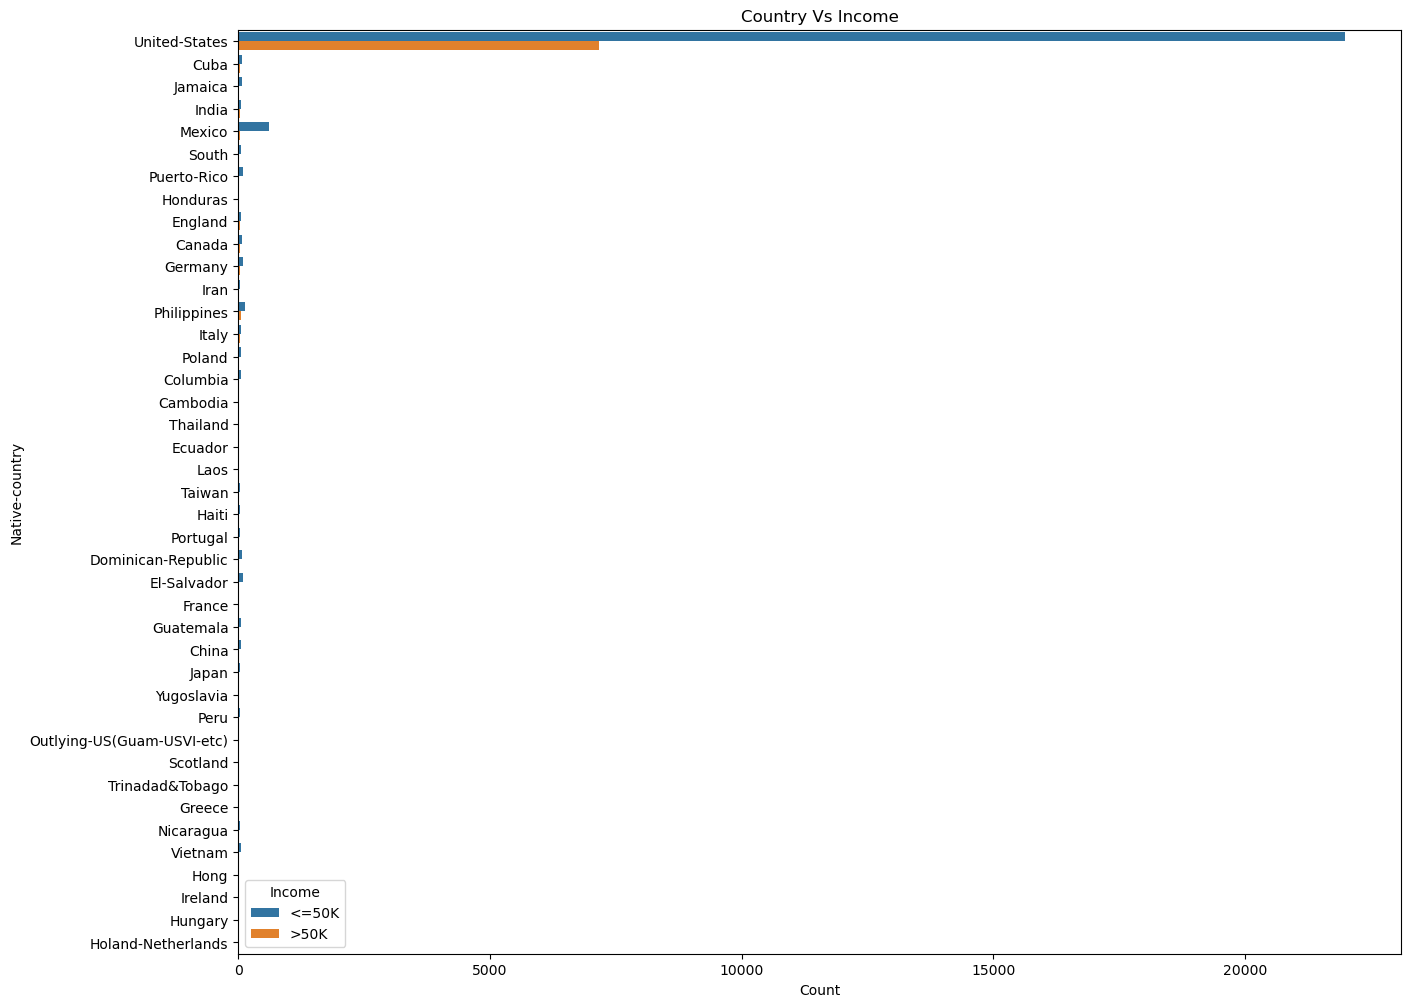

In [15]:
# Create a countplot of a categorical column
plt.figure(figsize=(15, 12))
sns.countplot(df, y='Native-country',hue='Income')
plt.xlabel('Count')
plt.ylabel('Native-country')
plt.title('Country Vs Income')
plt.show()

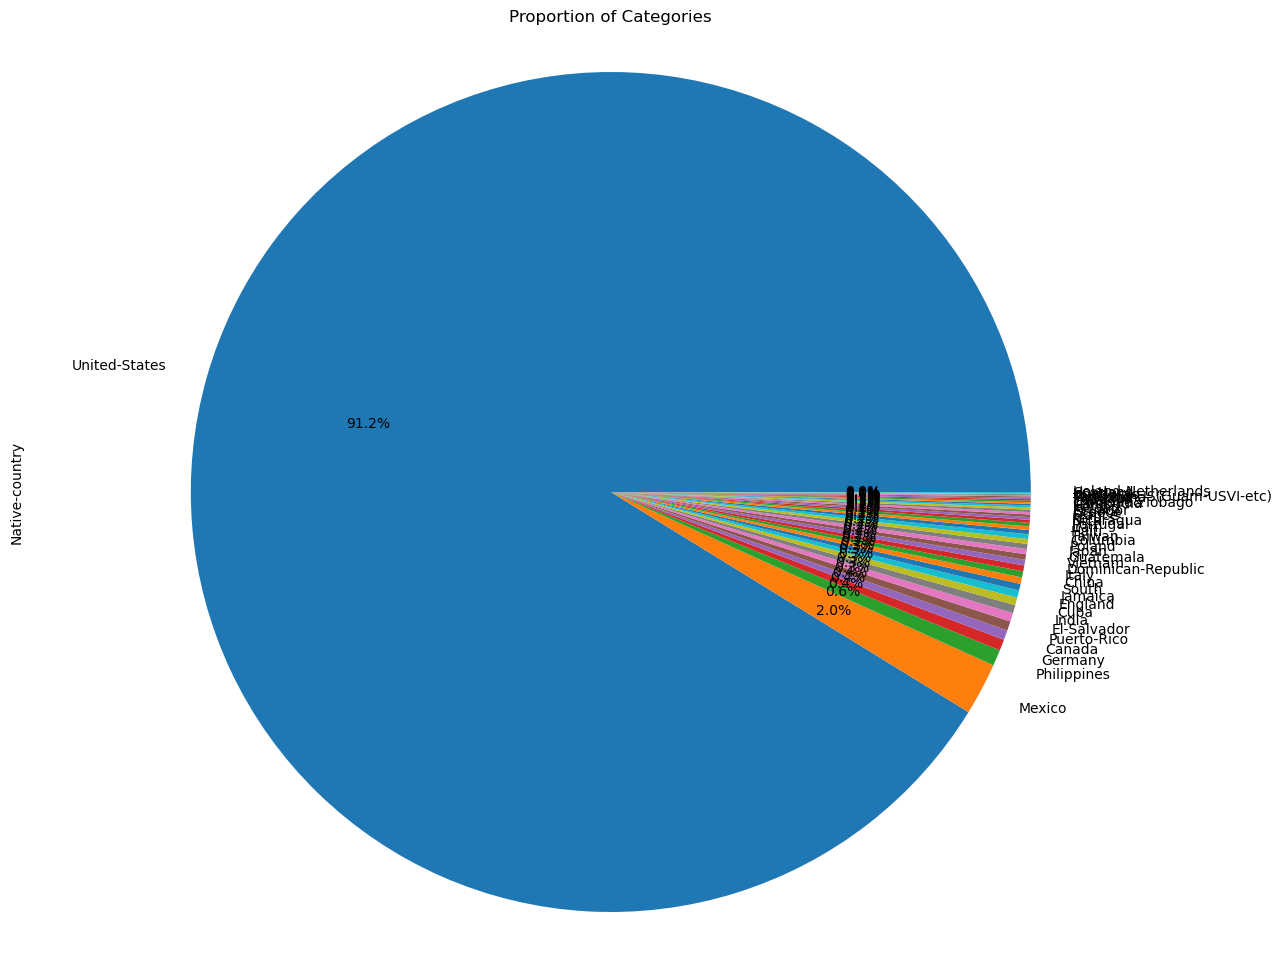

In [16]:
# Create a pie chart of a categorical column
plt.figure(figsize=(15, 12))
df['Native-country'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Categories')
plt.axis('equal')
plt.show()

####  In this dataset United-States has occupied 91.2 % of whole data and rest are Others Countries

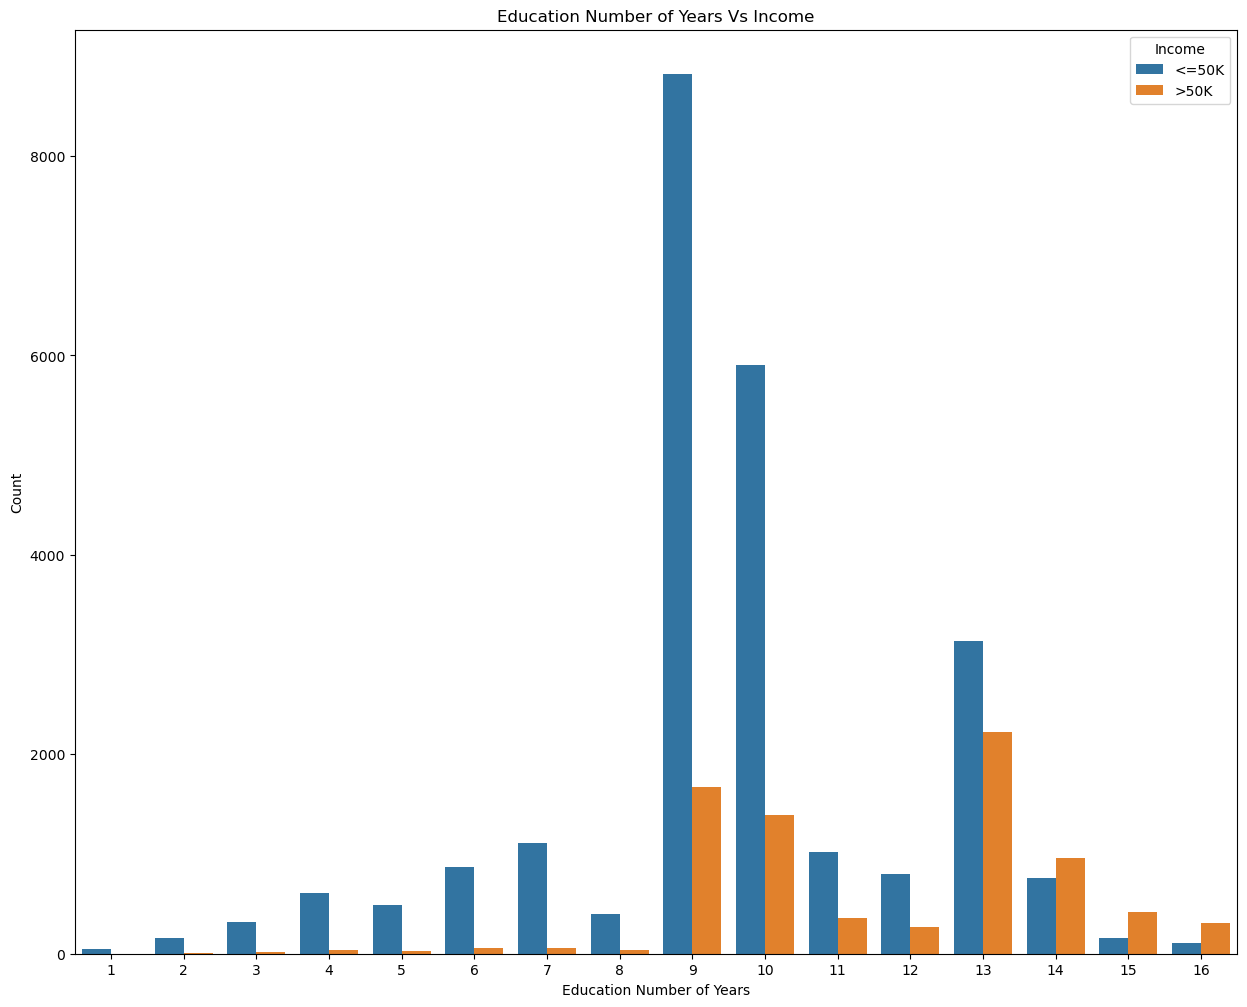

In [17]:
# Create a countplot of a categorical column
plt.figure(figsize=(15, 12))
sns.countplot(df, x='Education Number of Years',hue='Income')
plt.xlabel('Education Number of Years')
plt.ylabel('Count')
plt.title('Education Number of Years Vs Income')
plt.show()

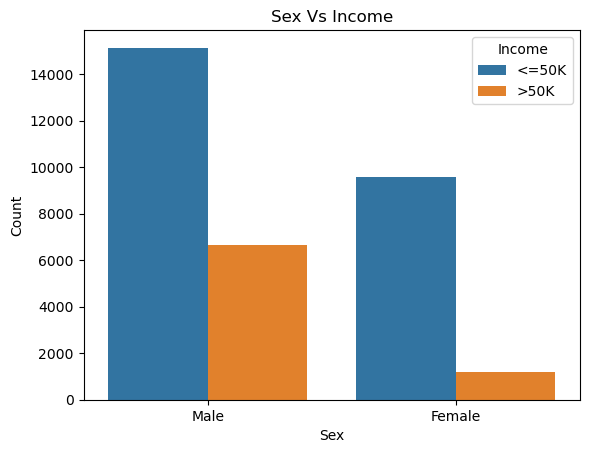

In [18]:
# Create a countplot of a categorical column
sns.countplot(df, x='Sex',hue='Income')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Vs Income')
plt.show()

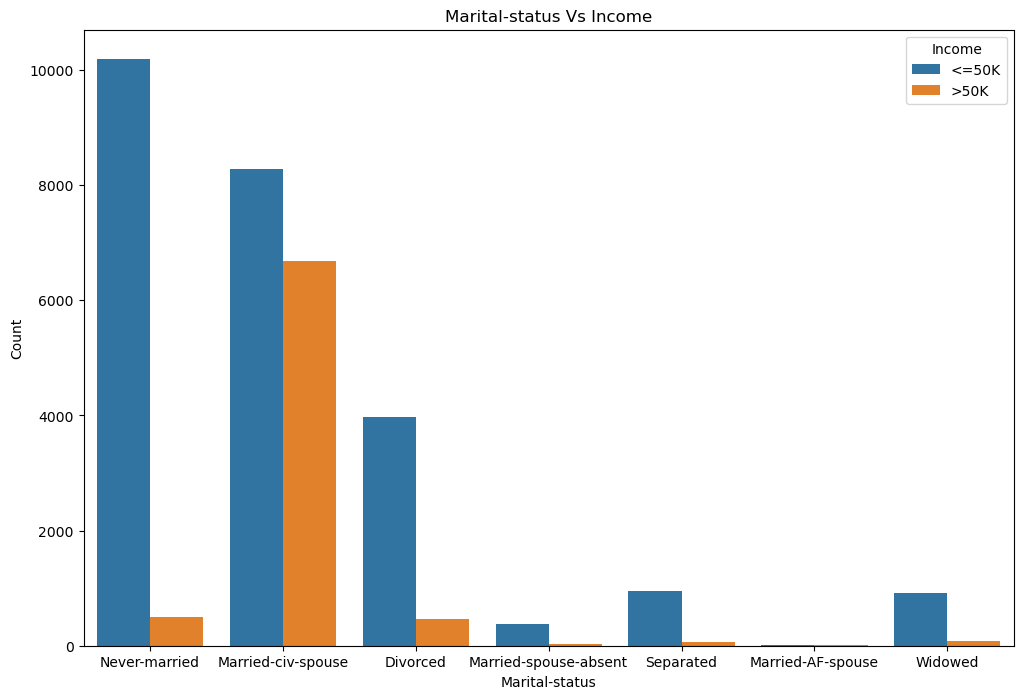

In [19]:
# Create a countplot of a categorical column
plt.figure(figsize=(12,8))
sns.countplot(df, x='Marital-status',hue='Income')
plt.xlabel('Marital-status')
plt.ylabel('Count')
plt.title('Marital-status Vs Income')
plt.show()

#### Married-civ-spouse earn more comparison to others

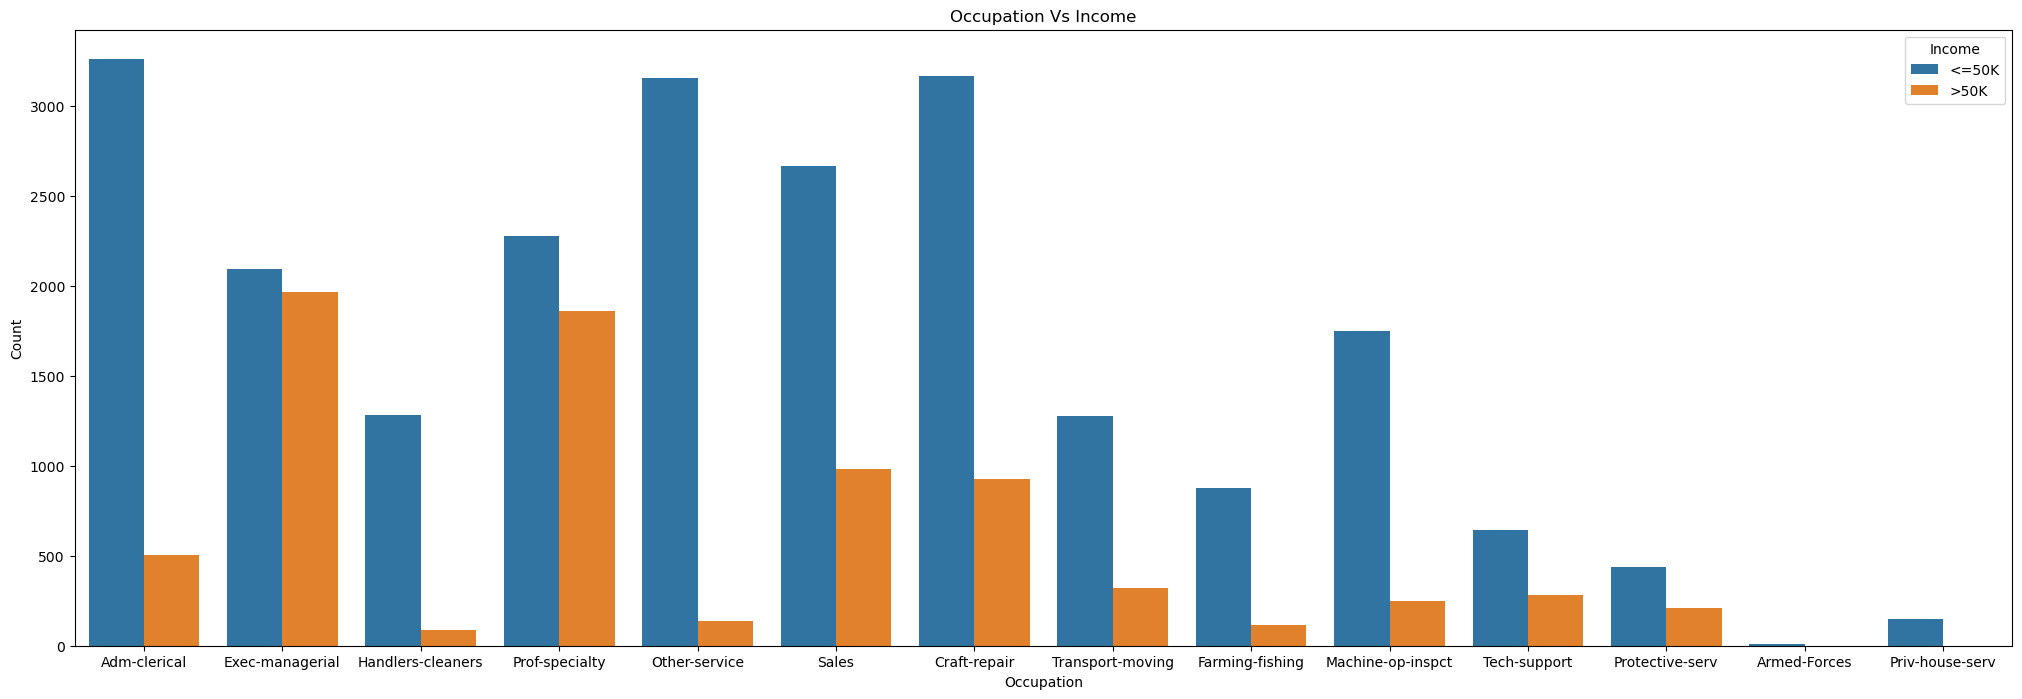

In [20]:
# Create a countplot of a categorical column
plt.figure(figsize=(25,8))
sns.countplot(df, x='Occupation',hue='Income')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Vs Income')
plt.show()

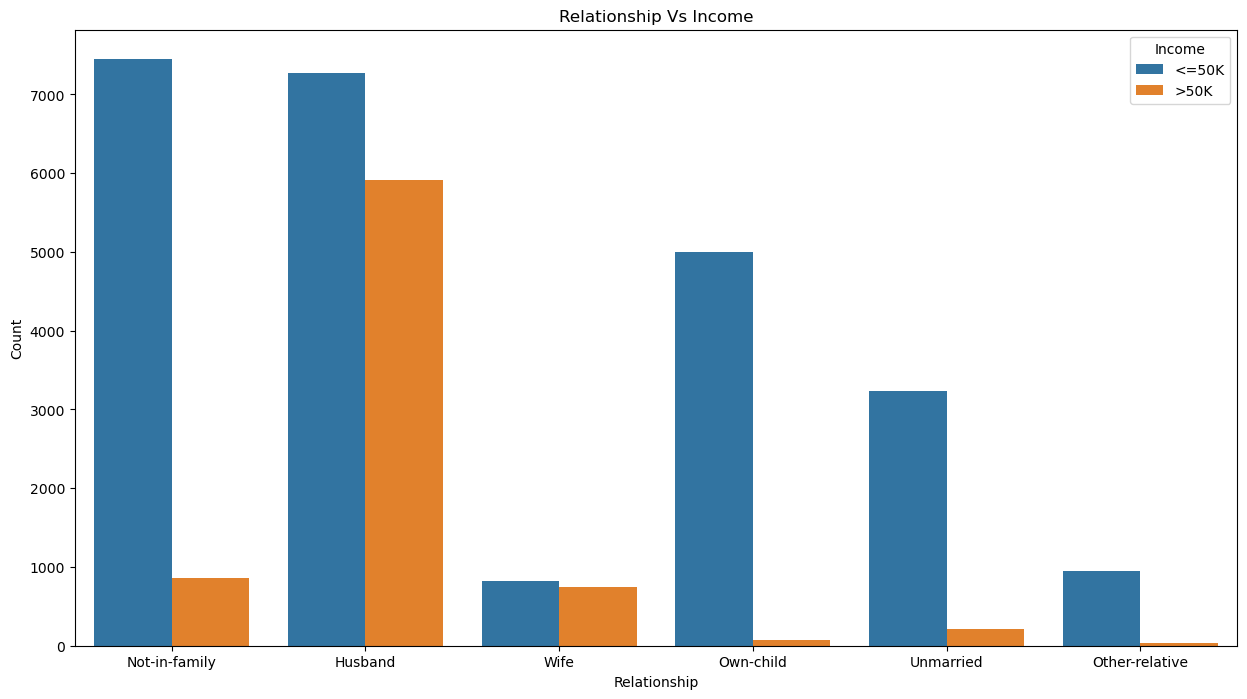

In [21]:
# Create a countplot of a categorical column
plt.figure(figsize=(15,8))
sns.countplot(df, x='Relationship',hue='Income')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.title('Relationship Vs Income')
plt.show()

#### Husband earn more comparision to other relationship

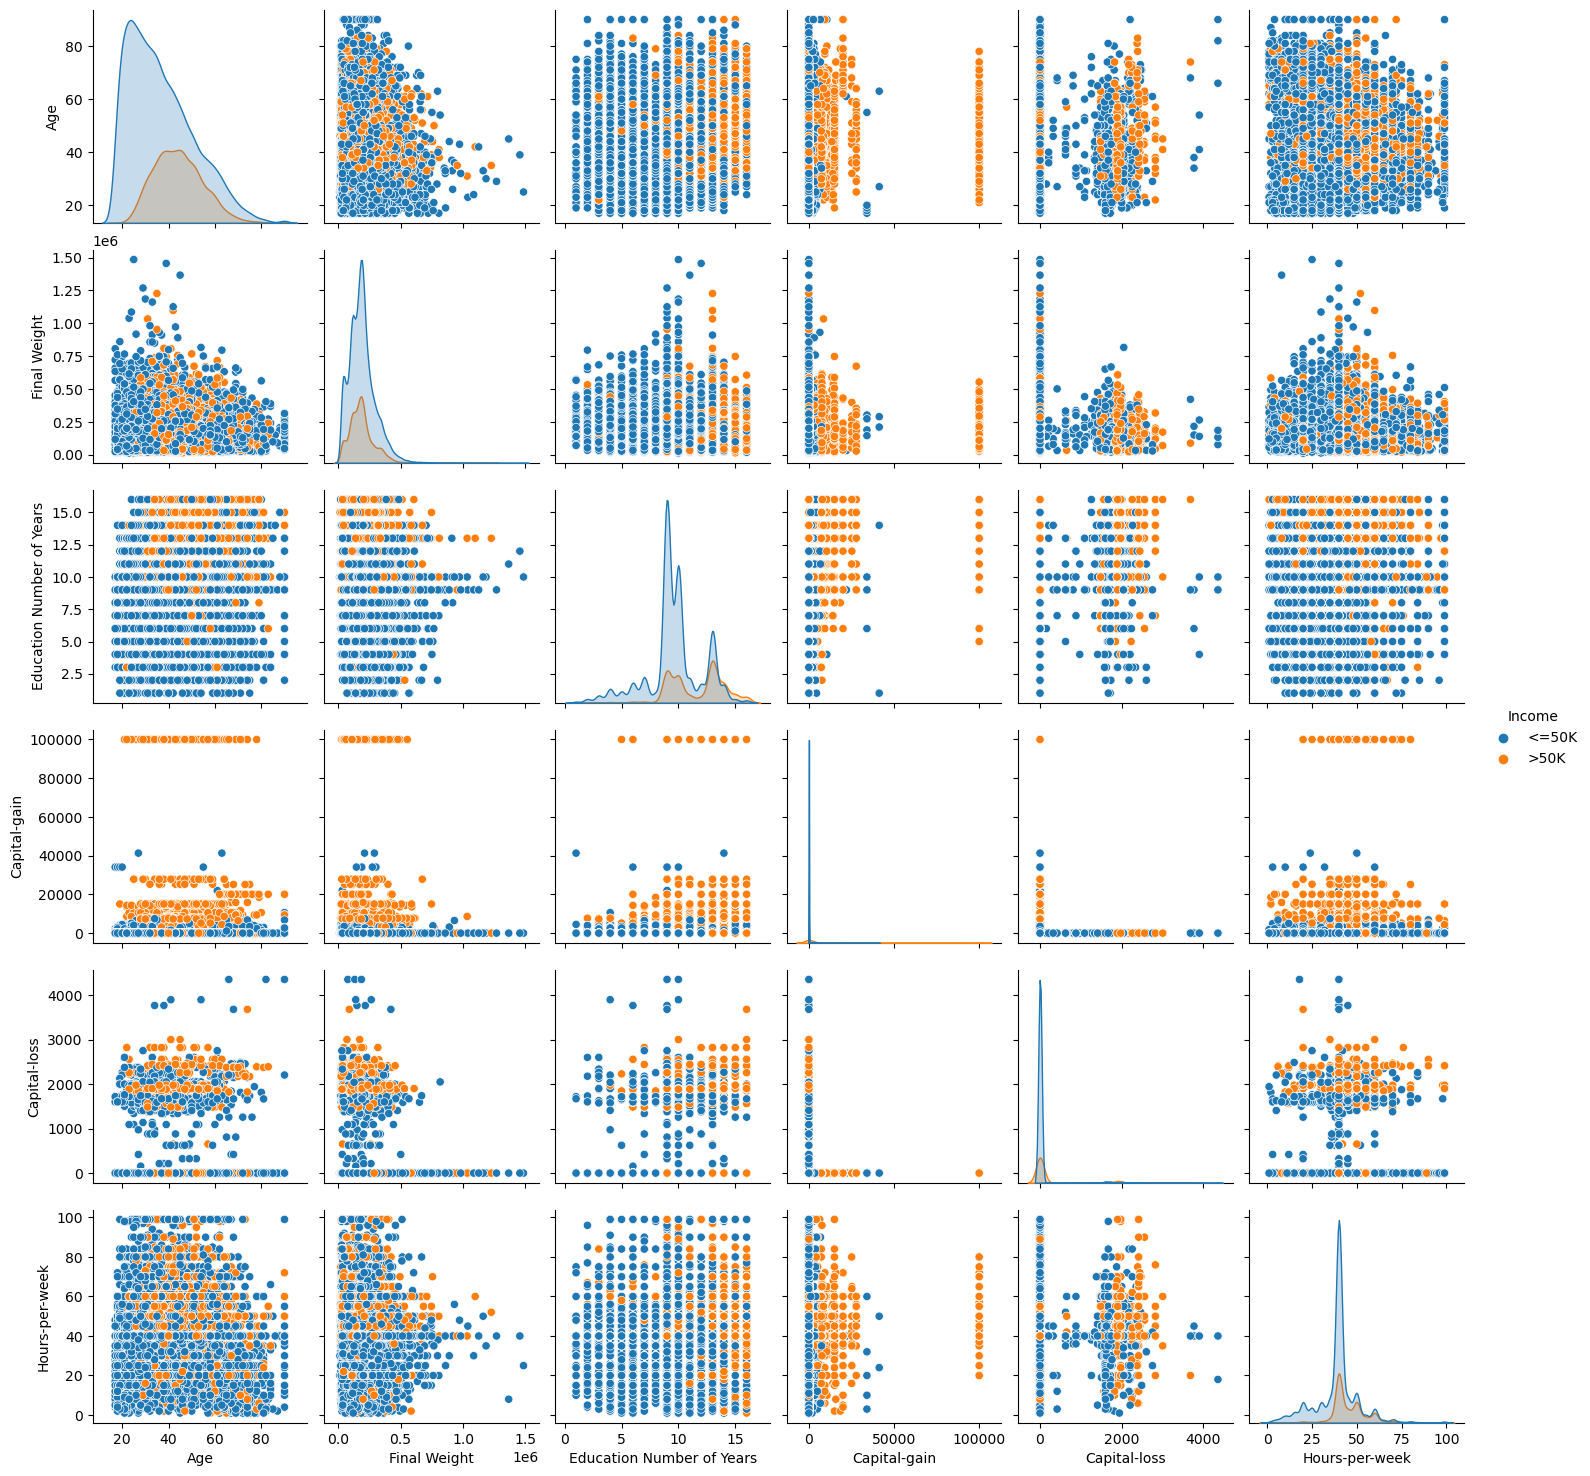

In [22]:
# pairplot
sns.pairplot(df, hue='Income')

C:\Users\miqba\AppData\Local\Temp\ipykernel_10928\2306337895.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='viridis', annot= True)


<Axes: >

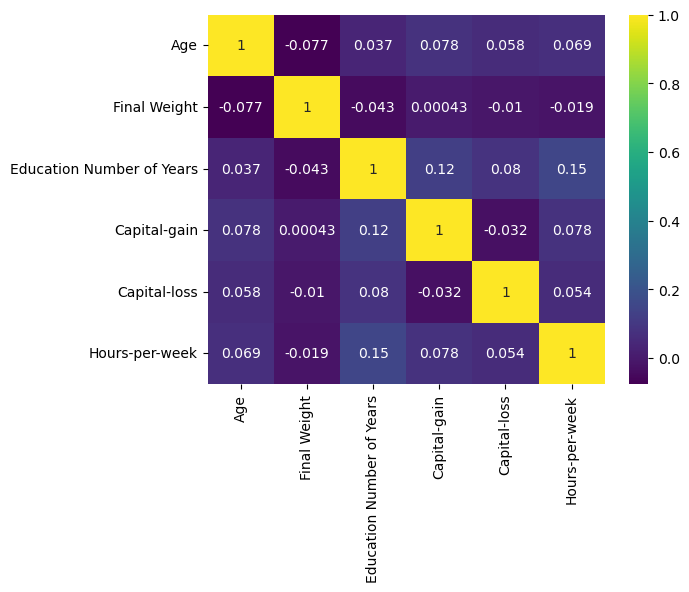

In [23]:
sns.heatmap(df.corr(), cmap='viridis', annot= True)

## Handling Missing Value

In [24]:
# Handling Missing Value for Categorical Column with mode
df['Workclass'] = df['Workclass'].fillna(df['Workclass'].mode()[0])
df['Occupation'] = df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Native-country'] = df['Native-country'].fillna(df['Native-country'].mode()[0])

## Convert Categorical into Numerical

In [25]:
# Define the mapping for Education Column
education_mapping = {
    'Preschool': 0,
    '1st-4th': 0,
    '5th-6th': 1,
    '7th-8th': 1,
    '9th': 2,
    '10th': 2,
    '11th': 2,
    '12th': 2,
    'HS-grad': 3,
    'Some-college': 4,
    'Assoc-voc': 5,
    'Assoc-acdm': 5,
    'Bachelors': 6,
    'Masters': 7,
    'Prof-school': 7,
    'Doctorate': 7
}

In [26]:
df['Education'] = df['Education'].map(education_mapping)
df['Income']=df['Income'].map({'<=50K':0,'>50K':1})
print(df['Education'].value_counts())
print(df['Income'].value_counts())

3    10501
4     7291
6     5355
2     3055
7     2712
5     2449
1      979
0      219
Name: Education, dtype: int64
0    24720
1     7841
Name: Income, dtype: int64


In [27]:
df = pd.get_dummies(df, columns=['Workclass', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-country'],drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 84 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Age                                        32561 non-null  int64
 1   Final Weight                               32561 non-null  int64
 2   Education                                  32561 non-null  int64
 3   Education Number of Years                  32561 non-null  int64
 4   Capital-gain                               32561 non-null  int64
 5   Capital-loss                               32561 non-null  int64
 6   Hours-per-week                             32561 non-null  int64
 7   Income                                     32561 non-null  int64
 8   Workclass_Local-gov                        32561 non-null  uint8
 9   Workclass_Never-worked                     32561 non-null  uint8
 10  Workclass_Private                          325

## Handling Imbalanced Data

In [28]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [29]:
X = df.drop('Income', axis=1)
y= df['Income']

In [30]:
# Apply SMOTE to oversample the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [31]:
# Create a new balanced DataFrame
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['target'] = y_resampled

In [32]:
balanced_df['target'].value_counts()

0    24720
1    24720
Name: target, dtype: int64

### Now Data Is Balanced

In [33]:
balanced_df.head()

,Age,Final Weight,Education,Education Number of Years,Capital-gain,Capital-loss,Hours-per-week,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Marital-status_Married-AF-spouse,Marital-status_Married-civ-spouse,Marital-status_Married-spouse-absent,Marital-status_Never-married,Marital-status_Separated,Marital-status_Widowed,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Sex_Male,Native-country_Canada,Native-country_China,Native-country_Columbia,Native-country_Cuba,Native-country_Dominican-Republic,Native-country_Ecuador,Native-country_El-Salvador,Native-country_England,Native-country_France,Native-country_Germany,Native-country_Greece,Native-country_Guatemala,Native-country_Haiti,Native-country_Holand-Netherlands,Native-country_Honduras,Native-country_Hong,Native-country_Hungary,Native-country_India,Native-country_Iran,Native-country_Ireland,Native-country_Italy,Native-country_Jamaica,Native-country_Japan,Native-country_Laos,Native-country_Mexico,Native-country_Nicaragua,Native-country_Outlying-US(Guam-USVI-etc),Native-country_Peru,Native-country_Philippines,Native-country_Poland,Native-country_Portugal,Native-country_Puerto-Rico,Native-country_Scotland,Native-country_South,Native-country_Taiwan,Native-country_Thailand,Native-country_Trinadad&Tobago,Native-country_United-States,Native-country_Vietnam,Native-country_Yugoslavia,target
0,39,77516,6,13,2174,0,40,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,83311,6,13,0,0,13,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,215646,3,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,234721,2,7,0,0,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,338409,6,13,0,0,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
